In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')

In [2]:
data = pd.read_csv('AdvertAndSales.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
data.shape

(4572, 5)

In [6]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [7]:
data = data.dropna()

In [8]:
num = data.select_dtypes(include = ['number'])
cat = data.select_dtypes(exclude = ['number'])
print('Numerical columns:\n')
display(num.head())
print('\nCategorical coulmns:')
display(cat.head())

Numerical columns:



,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181



Categorical coulmns:


,Influencer
0,Mega
1,Mega
2,Mega
3,Mega
4,Micro


In [9]:
num.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


<Axes: >

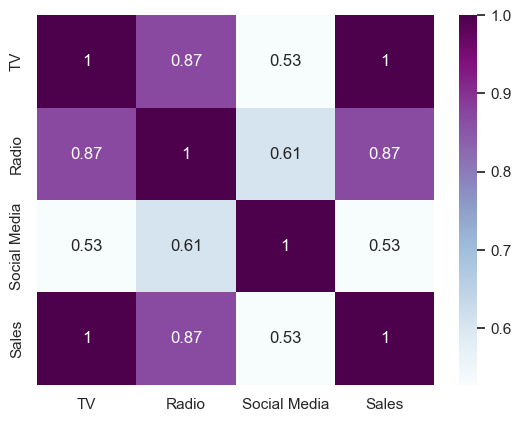

In [10]:
sns.heatmap(num.corr(),annot = True, cmap = 'BuPu')

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

df = data.copy()

for i in df.drop('Sales', axis = 1):
  if i in df.select_dtypes(include = 'number').columns:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl','wb'))
else:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl','wb'))

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,-1.458233,-1.199655,-0.187919,1,54.732757
1,-1.573167,-0.923162,-0.413343,1,46.677897
2,-0.500455,-0.235049,-0.185464,1,150.177829
3,1.108613,1.227722,1.627686,1,298.246340
4,-1.496545,-1.005995,-0.867239,2,56.594181


In [13]:
x = df.drop('Sales', axis = 1)
y = df['Sales']


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest, = train_test_split(x, y, test_size = 0.2, random_state = 40)



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score  
model = LinearRegression()


model.fit(xtrain, ytrain)   
model


LinearRegression()

In [20]:
validate = model.predict(xtrain)
print(f'Model Cross Validation is: {round(r2_score(ytrain, validate)*100, 2)}')

Model Cross Validation is: 99.9


In [19]:
pred = model.predict(xtest)
print(f'Model Performance is: {round(r2_score(ytest, pred)*100, 2)}')

Model Performance is: 99.9


In [21]:
joblib.dump(model, open('Advertmodel.pkl', 'wb'))